# Exercise 1: Wiener Filter

In [1]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### (a) Optimal filter weights

In [2]:
R_x = np.array([[5, -1, -2],[-1, 5, -1],[-2, -1, 5]])
r_yx = np.array([1, 5.3, -3.9]).reshape((3,1))
R_x_inv = np.linalg.inv(R_x)

w_o = np.dot(R_x_inv,  r_yx)
print("Optimal weights are:\n", w_o)
print("")
print("inverse of R_x is:\n", R_x_inv)


Optimal weights are:
 [[ 0.2]
 [ 1. ]
 [-0.5]]

inverse of R_x is:
 [[0.26373626 0.07692308 0.12087912]
 [0.07692308 0.23076923 0.07692308]
 [0.12087912 0.07692308 0.26373626]]


# Exercise 2: Steepest Gradient Descent

### (b) Calculate eigenvalues of R_x

In [3]:
eigenvalues = np.linalg.eigvals(R_x)
print("eigenvalues of R_x are:\n", eigenvalues)
# alpha between 0 and 1/7

eigenvalues of R_x are:
 [2.26794919 7.         5.73205081]


### (c) Implementing the filter update rule of the GD algorithm 

#### Loading data

In [4]:
# Load the CSV file into a DataFrame
df = pd.read_csv('assignment1_data.csv', header=None)

# Assign column names assuming the first column is x and the second column is y
df.columns = ['x', 'y']

# Print the DataFrame to verify the data
print(df)

            x        y
0     0.00000  0.34438
1    -1.10410 -0.17451
2     0.31334 -0.66892
3    -0.88409 -0.14649
4    -1.96720 -0.82132
...       ...      ...
9995 -0.32324  1.42040
9996  1.03690 -0.61886
9997 -3.23190  0.46254
9998  3.57420 -3.25900
9999  1.42070  5.26790

[10000 rows x 2 columns]


#### Initialize filter & Implement the adaptive filter to perform N iterations.


In [5]:
# Initialize weights and learning rate
weights = np.array([0,0,0]).reshape(3,1)
alpha = 0.01 # Should be between 0 and 1/7

J, weights_history = [], []

for i in range(2,len(df)):

    #Predict
    x = np.array([df['x'][i-2],df['x'][i-1],df['x'][i]]).reshape(1,3)[0] #input
    y_hat = np.dot(x, weights)[0] #Prediction

    #Error
    y = df['y'][i] #ground truth y
    J.append(((y-y_hat)**2)) #calculate MSE loss

    #Update
    weights_history.append(weights) #Add current weights to history
    weights = weights + 2*alpha*(r_yx - np.dot(R_x, weights)) #Update weights according to known statistics

print("Final weights are:\n", weights)

Final weights are:
 [[ 0.2]
 [ 1. ]
 [-0.5]]


#### Plotting trajectory of the filter coefficients, together with a contour plot of the objective function J

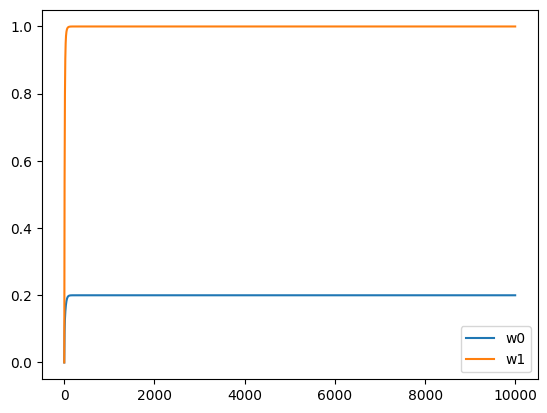

In [6]:
w0,w1,w2 = [],[],[]
for i in range(len(weights_history)):
    w0.append(weights_history[i][0])
    w1.append(weights_history[i][1])
    w2.append(weights_history[i][2])

# Show the convergence of the weights
plt.plot(w0, label='w0')
plt.plot(w1, label='w1')
plt.legend()
plt.show()

#### Contour plot

In [ ]:
w0 = np.linspace(-2.5,2.5)
w1 = np.linspace(-2.5,2.5)
w2 = np.ones(100)*-0.5

# eerst J uitrekenen voor meshgrid
for i, w0 in enumerate(w0):
    for j, w1 in enumerate(w1):

        #J[i,j] = Error



W0, W1 = np.meshgrid(w0, w1)
plt.contour(W0, W1, J)

# Exercise 3: Newton’s Method

In [ ]:
weights = np.array([0,0,0]).reshape(3,1)
J, weights_history = [], []
alpha = 1e-3
R_x = np.array(([5, -1, -2],[-1, 5, -1],[-2, -1, 5]))
r_yx = np.array([1, 5.3, -3.9]).reshape((3,1))

for i in range(2,len(df)):

    #Predict
    x = np.array([df['x'][i-2],df['x'][i-1],df['x'][i]]).reshape(1,3)[0] #input
    y_hat = np.dot(x, weights)[0] #Prediction

    #Error
    y = df['y'][i] #ground truth y
    J.append(((y-y_hat)**2)) #calculate MSE loss

    #Update
    weights_history.append(weights) #Add current weights to history
    weights = weights + np.dot(2*alpha*np.linalg.inv(R_x),(r_yx - np.dot(R_x, weights))) #Update weights according to the newton rule
print("Final weights are:\n", weights)

# Exercise 4: LMS and NLMS

# Exercise 5: RLS

# Exercise 6

#### (a) Importing the data and plotting a sample of the dataset.

Number of training examples: 60000
Number of test examples: 10000


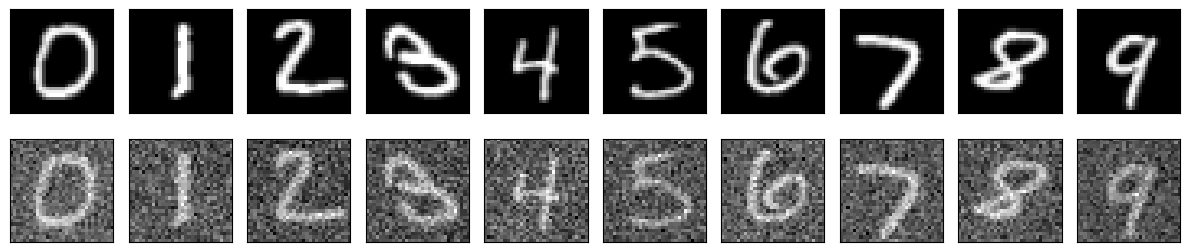

In [7]:
# Import necessary libraries
import torch
import os
from torch import nn
from torchvision import transforms, datasets
from MNIST_dataloader import create_dataloaders
from torch.utils.data import random_split

# Define parameters
data_loc = '.'
batch_size = 64

# Create dataloader
train_loader, test_loader = create_dataloaders(data_loc, batch_size)

print("Number of training examples:", len(train_loader.dataset))
print("Number of test examples:", len(test_loader.dataset))

# Get some examples
examples = enumerate(test_loader)
_, (x_clean_example, x_noisy_example, labels_example) = next(examples)

# Plot a sample of the dataset
plt.figure(figsize=(12, 3))
for i in range(10):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_clean_example[i, 0, :, :], cmap='gray')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(2, 10, i + 11)
    plt.imshow(x_noisy_example[i, 0, :, :], cmap='gray')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.savefig("data_examples.png", dpi=300, bbox_inches='tight')
plt.show()

#### Splitting the data into the trainingvalidation-test sets

In [8]:
# Set the seed for the random number generator
torch.manual_seed(42)

# Create dataloaders
train_loader, test_loader = create_dataloaders(data_loc, batch_size)

# Get the length of the train dataset
train_dataset_length = len(train_loader.dataset)

# Define the length of the validation dataset (e.g., 20% of the train dataset)
validation_dataset_length = int(train_dataset_length * 0.2)
train_dataset_length -= validation_dataset_length

# Split the train dataset into a new train dataset and a validation dataset
train_dataset, validation_dataset = random_split(train_loader.dataset, [train_dataset_length, validation_dataset_length])

# Create a DataLoader for the new train dataset and the validation dataset
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size)
validation_loader = torch.utils.data.DataLoader(validation_dataset, batch_size=batch_size)

print(f'Train dataset length: {len(train_loader.dataset)}')
print(f'Validation dataset length: {len(validation_loader.dataset)}')
print(f'Test dataset length: {len(test_loader.dataset)}')

Train dataset length: 48000
Validation dataset length: 12000
Test dataset length: 10000


#### (b) Building the fully connected network with linear layers

In [9]:
# Exercise 7 activation function
def my_relu(x):
    return torch.max(torch.zeros_like(x), x)

# Exercise 6 model
class DenoisingNet(nn.Module):
    def __init__(self):
        super(DenoisingNet, self).__init__()
        self.fc1 = nn.Linear(32*32, 512)  # Assuming the input images are 32x32
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 32*32)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        x = self.fc4(x)
        x = x.view(x.size(0), 1, 32, 32)  # Reshape the output back to a 2D image
        return x

# Exercise 7 model
class DenoisingNetV2(nn.Module):
    def __init__(self):
        super(DenoisingNetV2, self).__init__()
        self.fc1 = nn.Linear(32*32, 512)  # Assuming the input images are 32x32
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 512)
        self.fc4 = nn.Linear(512, 32*32)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = my_relu(self.fc1(x))
        x = my_relu(self.fc2(x)) 
        x = my_relu(self.fc3(x))
        x = self.fc4(x)  # No activation function
        x = x.view(x.size(0), 1, 32, 32)  # Reshape the output back to a 2D image
        return x

#### (c) Optimizers

The goal of an optimizer in a Neural Network is to adjust the parameters (weights and biases) of the model in order to minimize the loss function.

Stochastic Gradient Descent (SGD) and Steepest Gradient Descent are both optimization algorithms used to minimize the loss function. They have the following similarities and differences:

- Both algorithms aim to minimize the loss function.
- Both algorithms use the gradient of the loss function to update the parameters. The update rule is: new_params = old_params - learning_rate * gradient.

- Batch Size: The main difference between SGD and Steepest Gradient Descent (also known as Batch Gradient Descent) lies in the batch size, i.e., the number of samples used to calculate the gradient at each step. In Batch Gradient Descent, the entire training set is used to compute the gradient at each step, whereas in SGD, only one sample (or a mini-batch of samples) is used at each step. This makes SGD faster and able to escape local minima, but also makes it more noisy.
- Convergence: Due to the noise in SGD, it may not converge to the exact minimum, but will instead oscillate around the minimum. On the other hand, Batch Gradient Descent will converge to the global minimum for convex error surfaces and to a local minimum for non-convex surfaces.
- Computational Efficiency: SGD is computationally more efficient than Batch Gradient Descent, especially for large datasets and complex models, as it only uses a subset of the data at each step.
- Memory Usage: SGD uses less memory as it only needs to store a subset of the data for each step.

#### (d) Prediction untrained network using the validation set, to ensure that the model can actually run

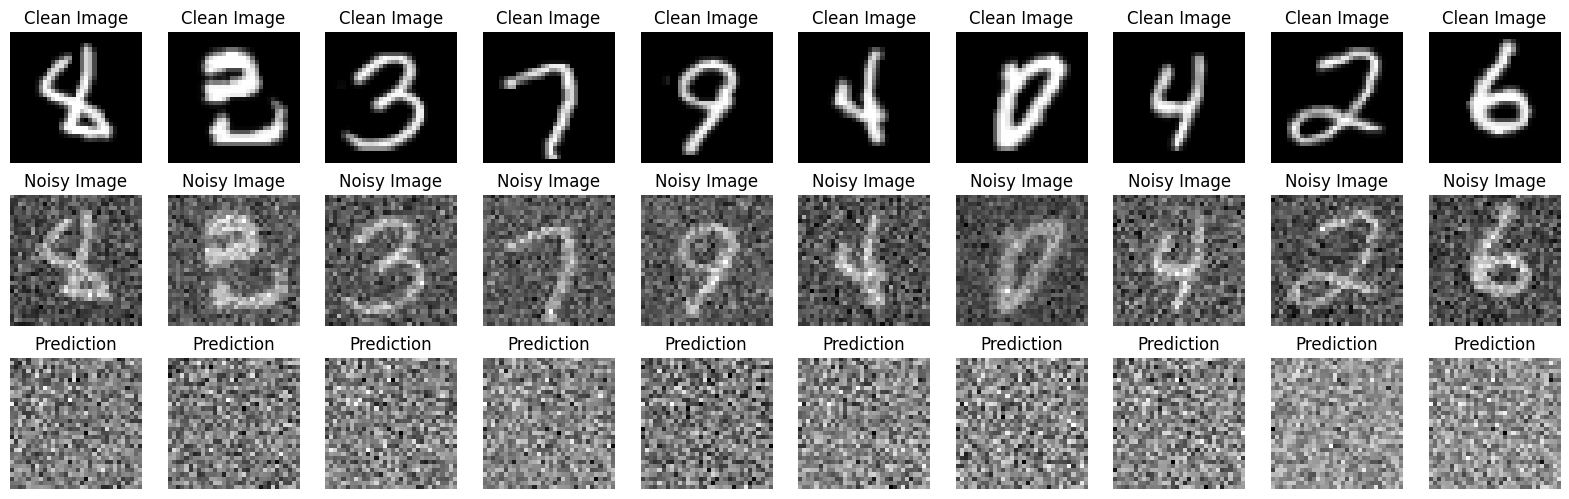

In [10]:
# Instantiate the model
model = DenoisingNet()

# Get some test data
examples = enumerate(validation_loader)
_, (x_clean_example, x_noisy_example, labels_example) = next(examples)

# Make a prediction with the untrained network
outputs = model(x_noisy_example)

# Plot the first 10 test images, noisy images and their corresponding predictions
fig, axs = plt.subplots(3, 10, figsize=(20, 6))

for i in range(10):
    # Plot the clean image
    axs[0, i].imshow(x_clean_example[i].view(32, 32).detach().numpy(), cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title('Clean Image')

    # Plot the noisy image
    axs[1, i].imshow(x_noisy_example[i].view(32, 32).detach().numpy(), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title('Noisy Image')

    # Plot the prediction
    axs[2, i].imshow(outputs[i].view(32, 32).detach().numpy(), cmap='gray')
    axs[2, i].axis('off')
    axs[2, i].set_title('Prediction')

plt.show()

#### (e) Training the model with SGD

In [11]:
# Check if CUDA is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if torch.cuda.is_available():
    print(f'CUDA is available!  Training on {device}.')
else:
    print(f'CUDA is not available.  Training on {device}.')

CUDA is available!  Training on cuda.


In [12]:
def plot_losses(train_losses, validation_losses, epochs):
    # Create a figure
    plt.figure()

    # Calculate the epoch for each batch and plot the training loss
    epochs_for_each_batch = np.linspace(1, epochs, len(train_losses))
    plt.plot(epochs_for_each_batch, train_losses, label='Training Loss')

    # Plot the validation loss
    plt.plot(range(1, epochs + 1), validation_losses, label='Validation Loss')

    # Add a title, x-label, y-label, and a legend
    plt.title('Training and Validation Loss Over Time')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Show the plot
    plt.show()

In [13]:
def train_and_validate(model, optimizer, criterion, train_loader, validation_loader, device, model_name, epochs=10):
    # Define the model weights file path
    model_weights_path = f'{model_name}_weights.pth'

    # Check if the model weights file exists
    if not os.path.isfile(model_weights_path):
        model = model.to(device)
        model.train()

        # Lists to store losses
        train_losses = []
        validation_losses = []

        # Train the model
        for epoch in range(epochs):  # loop over the dataset multiple times
            epoch_loss = 0.0
            for i, data in enumerate(train_loader, 0):
                # get the inputs; data is a list of [inputs, labels]
                inputs, noisy_inputs, _ = data
                inputs, noisy_inputs = inputs.to(device), noisy_inputs.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward + backward + optimize
                outputs = model(noisy_inputs)
                loss = criterion(outputs, inputs)
                loss.backward()
                optimizer.step()

                # Save the loss for this batch
                train_losses.append(loss.item())

                # Add the loss for this batch to the total loss for this epoch
                epoch_loss += loss.item()

            # Calculate the average loss for this epoch
            epoch_loss /= len(train_loader)

            print(f'Epoch {epoch + 1}, Average Training Loss: {epoch_loss}')

            # Validate the model
            validation_loss = 0.0
            model.eval()  # Set the model to evaluation mode
            with torch.no_grad():
                for data in validation_loader:
                    inputs_val, noisy_inputs_val, _ = data
                    inputs_val, noisy_inputs_val = inputs_val.to(device), noisy_inputs_val.to(device)
                    outputs = model(noisy_inputs_val)
                    loss = criterion(outputs, inputs_val)
                    validation_loss += loss.item()

            validation_loss /= len(validation_loader)
            validation_losses.append(validation_loss)
            print(f'Epoch {epoch + 1}, Validation Loss: {validation_losses[-1]}')

            model.train()  # Set the model back to training mode

        # Save the model weights
        torch.save(model.state_dict(), model_weights_path)

        print('Finished Training')

        plot_losses(train_losses, validation_losses, epochs)

        model.load_state_dict(torch.load(model_weights_path))
        model.eval()

    else:
        # Load the model weights
        model.load_state_dict(torch.load(model_weights_path))
        model = model.to(device)
        model.eval()

        print('Model weights loaded')

    return model

Epoch 1, Average Training Loss: 0.8416020868619283
Epoch 1, Validation Loss: 0.783117929671673
Epoch 2, Average Training Loss: 0.6763905117511749
Epoch 2, Validation Loss: 0.5379962975040395
Epoch 3, Average Training Loss: 0.4005170415242513
Epoch 3, Validation Loss: 0.2996595709564838
Epoch 4, Average Training Loss: 0.2613024432659149
Epoch 4, Validation Loss: 0.23946007808789294
Epoch 5, Average Training Loss: 0.23262978041172028
Epoch 5, Validation Loss: 0.2289083019850102
Epoch 6, Average Training Loss: 0.2274943884809812
Epoch 6, Validation Loss: 0.2267945574477632
Epoch 7, Average Training Loss: 0.22626643604040145
Epoch 7, Validation Loss: 0.2260664588117853
Epoch 8, Average Training Loss: 0.22568881646792094
Epoch 8, Validation Loss: 0.22557509872824588
Epoch 9, Average Training Loss: 0.22522578988472622
Epoch 9, Validation Loss: 0.22512814933632283
Epoch 10, Average Training Loss: 0.2247862043182055
Epoch 10, Validation Loss: 0.22469206970739872
Finished Training


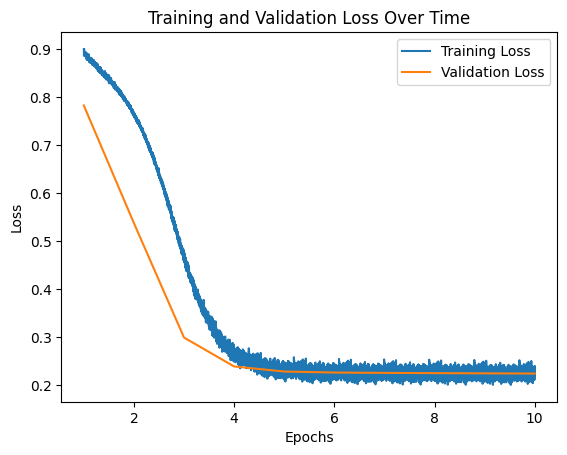

In [14]:
learning_rate = 0.001

model = DenoisingNet()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

model = train_and_validate(model, optimizer, criterion, train_loader, validation_loader, device, model_name='DenoisingNet')

#### Evaluating the trained model on test set

In [15]:
# Initialize the loss
test_loss = 0.0

# No need to track gradients in test phase, it saves memory and computations
with torch.no_grad():
    for data in test_loader:
        # Get the inputs and move them to the device
        clean_images, noisy_images, _ = data
        clean_images, noisy_images = clean_images.to(device), noisy_images.to(device)

        # Forward pass
        outputs = model(noisy_images)

        # Compute the loss
        loss = criterion(outputs, clean_images)

        # Add the loss for this batch to the total loss
        test_loss += loss.item()

# Compute the average test loss
test_loss /= len(test_loader)

print(f'Test Loss: {test_loss}')

Test Loss: 0.22605921764662312


#### (f) Show predictions with trained model on the test set

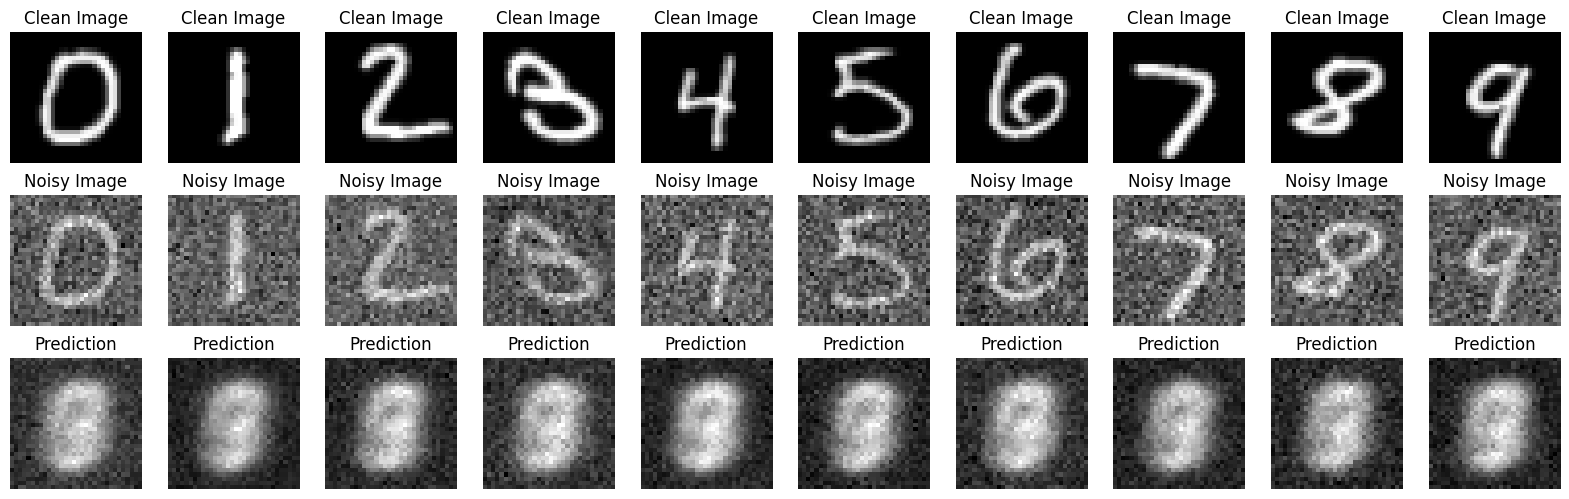

In [16]:
# Get some test data
examples = enumerate(test_loader)
_, (clean_example, noisy_example, labels_example) = next(examples)

# Make a prediction with the trained network
outputs = model(noisy_example.to(device))  # Make sure to move your inputs to the device

# Move outputs back to cpu for plotting
outputs = outputs.cpu()

# Plot the first 10 test images, noisy images and their corresponding predictions
fig, axs = plt.subplots(3, 10, figsize=(20, 6))

for i in range(10):
    # Plot the clean image
    axs[0, i].imshow(clean_example[i].view(32, 32).detach().numpy(), cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title('Clean Image')

    # Plot the noisy image
    axs[1, i].imshow(noisy_example[i].view(32, 32).detach().numpy(), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title('Noisy Image')

    # Plot the prediction
    axs[2, i].imshow(outputs[i].view(32, 32).detach().numpy(), cmap='gray')
    axs[2, i].axis('off')
    axs[2, i].set_title('Prediction')

plt.show()

# Exercise 7

#### (a) Model with activation function

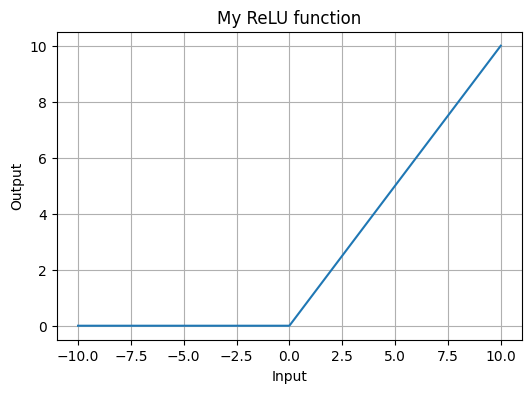

In [17]:
# Create a range of input values
x = torch.linspace(-10, 10, 1000)

# Apply the function to the input values
y = my_relu(x)

# Convert tensors to numpy arrays for plotting
x = x.numpy()
y = y.numpy()

# Create the plot
plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.title('My ReLU function')
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid(True)
plt.show()

#### (b) More sophisticated optimiser

The Adam optimizer is often chosen over the Stochastic Gradient Descent (SGD) optimizer due to several advantages:
- Adam uses adaptive learning rates, which means it computes individual learning rates for different parameters. This can be particularly useful when dealing with sparse gradients on noisy problems.
- Adam combines the advantages of two extensions of SGD, namely RMSProp (Root Mean Square Propagation) and Momentum. Momentum accelerates the convergence towards the relevant direction and reduces oscillation, while RMSProp helps to deal with the issue of vanishing and exploding gradients.

While Adam can be better in many situations, there's no guarantee it will always outperform SGD. The choice of optimizer often depends on the specific problem at hand.

#### (c) Prediction using the untrained network using the test data.

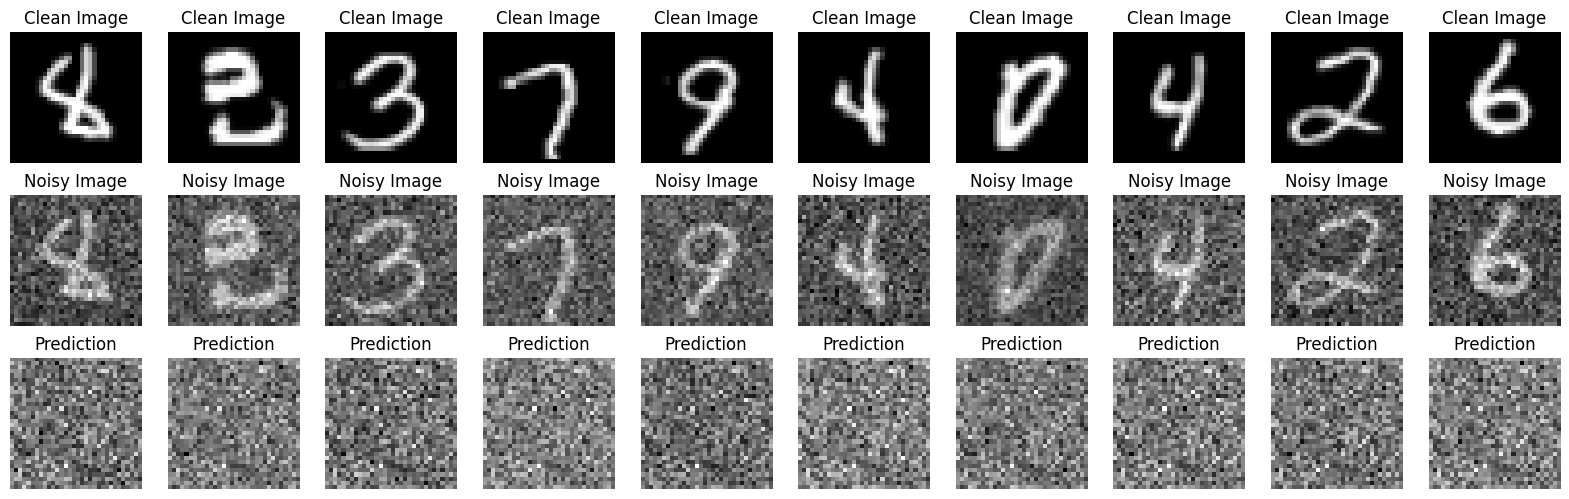

In [18]:
# Instantiate the model
model = DenoisingNetV2()

# Get some test data
examples = enumerate(validation_loader)
_, (x_clean_example, x_noisy_example, labels_example) = next(examples)

# Make a prediction with the untrained network
outputs = model(x_noisy_example)

# Plot the first 10 test images, noisy images and their corresponding predictions
fig, axs = plt.subplots(3, 10, figsize=(20, 6))

for i in range(10):
    # Plot the clean image
    axs[0, i].imshow(x_clean_example[i].view(32, 32).detach().numpy(), cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title('Clean Image')

    # Plot the noisy image
    axs[1, i].imshow(x_noisy_example[i].view(32, 32).detach().numpy(), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title('Noisy Image')

    # Plot the prediction
    axs[2, i].imshow(outputs[i].view(32, 32).detach().numpy(), cmap='gray')
    axs[2, i].axis('off')
    axs[2, i].set_title('Prediction')

plt.show()

#### (d) Training the improved network with activation function

Epoch 1, Average Training Loss: 0.07715311010181904
Epoch 1, Validation Loss: 0.04327872918641314
Epoch 2, Average Training Loss: 0.03882498571276665
Epoch 2, Validation Loss: 0.03555919881910086
Epoch 3, Average Training Loss: 0.033865460572143395
Epoch 3, Validation Loss: 0.032749798049793596
Epoch 4, Average Training Loss: 0.0313272403900822
Epoch 4, Validation Loss: 0.030942300037342184
Epoch 5, Average Training Loss: 0.02978073599934578
Epoch 5, Validation Loss: 0.029496565421528006
Epoch 6, Average Training Loss: 0.028592266745865343
Epoch 6, Validation Loss: 0.028724777373544712
Epoch 7, Average Training Loss: 0.027591816030442716
Epoch 7, Validation Loss: 0.028020308075591603
Epoch 8, Average Training Loss: 0.026757652312517165
Epoch 8, Validation Loss: 0.027487689678735557
Epoch 9, Average Training Loss: 0.026027878123025098
Epoch 9, Validation Loss: 0.02689541672217719
Epoch 10, Average Training Loss: 0.025390853360295295
Epoch 10, Validation Loss: 0.02645398738813844
Finishe

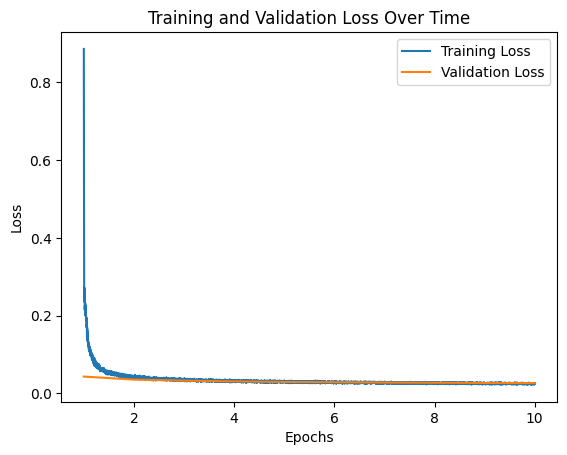

In [19]:
learning_rate = 0.001

model = DenoisingNetV2()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

model = train_and_validate(model, optimizer, criterion, train_loader, validation_loader, device, model_name='DenoisingNetV2')

#### (e) Prediction on the test set using the improved trained model

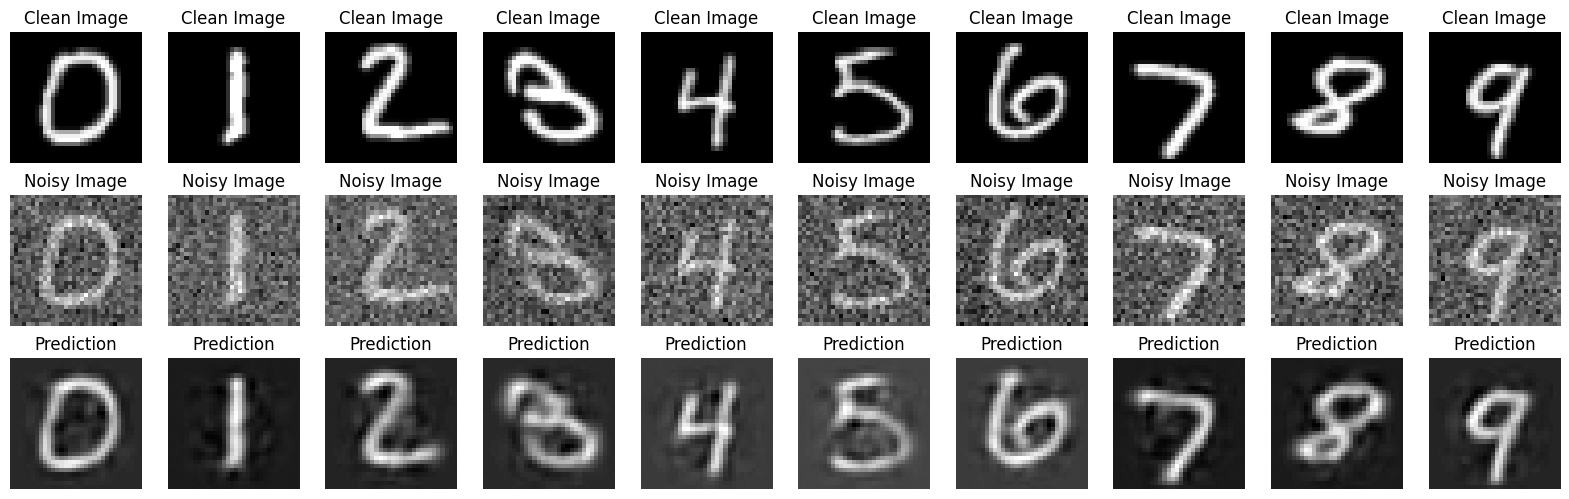

In [20]:
# Get some test data
examples = enumerate(test_loader)
_, (clean_example, noisy_example, labels_example) = next(examples)

# Make a prediction with the trained network
outputs = model(noisy_example.to(device))  # Make sure to move your inputs to the device

# Move outputs back to cpu for plotting
outputs = outputs.cpu()

# Plot the first 10 test images, noisy images and their corresponding predictions
fig, axs = plt.subplots(3, 10, figsize=(20, 6))

for i in range(10):
    # Plot the clean image
    axs[0, i].imshow(clean_example[i].view(32, 32).detach().numpy(), cmap='gray')
    axs[0, i].axis('off')
    axs[0, i].set_title('Clean Image')

    # Plot the noisy image
    axs[1, i].imshow(noisy_example[i].view(32, 32).detach().numpy(), cmap='gray')
    axs[1, i].axis('off')
    axs[1, i].set_title('Noisy Image')

    # Plot the prediction
    axs[2, i].imshow(outputs[i].view(32, 32).detach().numpy(), cmap='gray')
    axs[2, i].axis('off')
    axs[2, i].set_title('Prediction')

plt.show()

#### (f) Would a linear model benefit from additional layers?

Adding more layers to a linear model effectively makes it a deep neural network, which can capture more complex patterns in the data. If your linear model is underfitting the data (i.e., it has high bias), adding more layers could potentially improve its performance by increasing the model's capacity.

However, there are a few things to consider:

- Overfitting: While adding more layers can help the model learn more complex patterns, it can also lead to overfitting, where the model learns the noise in the training data. This results in poor performance on unseen data. If you decide to add more layers, be sure to also use techniques to prevent overfitting, such as regularization and dropout.

- Computational Cost: More layers mean more parameters for the model to learn, which increases the computational cost. Make sure your hardware can handle the increased complexity.

- Data Complexity: If your data is not that complex (e.g., it's linearly separable), a linear model might be sufficient and adding more layers won't lead to significant improvements.